In [26]:
using JLD, PyPlot

In [27]:
using HDF5

In [28]:
nombre="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
#archivocm=archivo[1:end-4]*"-CM.jld"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

In [29]:
arxivo=h5open(nombre)
elementos=names(arxivo)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [30]:
csda=read(arxivo["CSDALindenberg"])
lfp=read(arxivo["LFPSaturados"])
freq=read(arxivo["freq"])
#KOp=Arxivo["KTT_KInv"];

In [31]:
freq

7.022058198545425

In [32]:
(alto,ancho,tmax)=size(csda)

(64, 64, 2000)

In [33]:
satu=read(arxivo["CanalesMalos"]);

In [34]:
nsatu=size(satu)

(117, 2)

In [35]:
listonga=(135,139,149)   

(135, 139, 149)

In [36]:
#retrazo=Arxivo["retrazo"]
retrazo=0

0

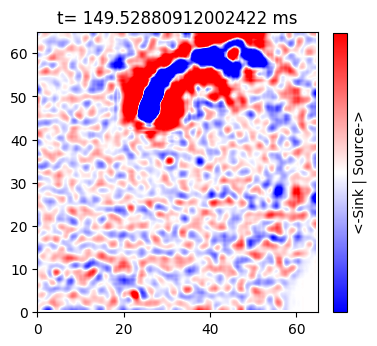

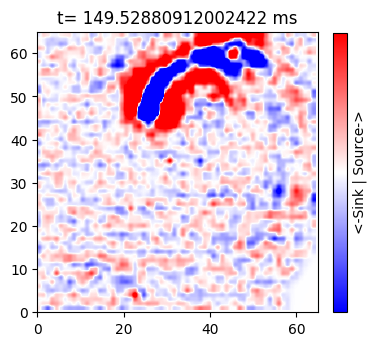

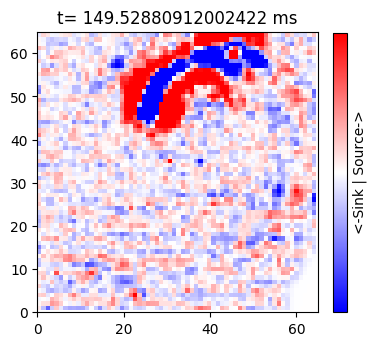

In [37]:
t=1050
#ion()
ioff()
lista=("sinc", "hanning", "nearest")
limites=20
 ejemplo=csda[:,:,t]
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

   
    tiempo=round(t-retrazo)/freq

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx.set_label("<-Sink | Source->")
end

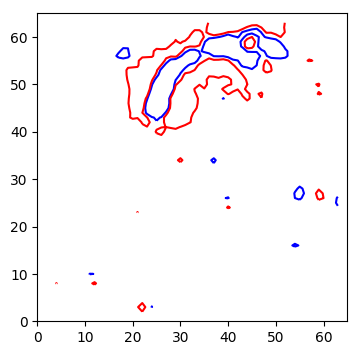

PyObject <matplotlib.contour.QuadContourSet object at 0x7ff07782f208>

In [38]:
epsi=8.83*1.5 # usa el mismo valor que usaste para obtener los componentes disjuntos
#v=(-limites,0,limites)
figure(figsize=(4,4))
v=(-epsi,epsi)
#axis("equal")
xlim(0,65)
ylim(0,65)

contour(ejemplo, v, colors=("blue", "red"))

In [39]:
inicio=1
final=2000
paso=1
tmax

2000

In [40]:
archivocm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"

Centros=load(archivocm)
CMPos=Centros["CMP"];
CMNeg=Centros["CMN"];


In [41]:
function contornoyfondoplot(fondo, epsi=epsi, limites=150, n=1000)

    limites=150

#for n=inicio:paso:final
    figura=figure(figsize=(3,3))
    xlim(0,65)
    ylim(0,65)
    exten=[0.5,64.5,0.5,64.5,]
    
    ejemplo=fondo[:,:,n]
    tiempo=round((n-retrazo)/freq, digits=1);
  #  print(tiempo, " ")
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="nearest",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=exten)

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx.set_label("<-Sink | Source->")

    v=(-epsi,epsi)
    contour(ejemplo, v, colors=("blue", "red"), extent=exten)
    xticks(0:10:60)
    yticks(0:10:60)
   
   nstring=lpad(n, 5, "0")
    
    return figure
        
end

function contornoyfondoplot(fondo, cmpos, cmneg, epsi=epsi, limites=150, n=1000)

    limites=150

#for n=inicio:paso:final
    figura=figure(figsize=(3,3))
    xlim(0,65)
    ylim(0,65)
    exten=[0.5,64.5,0.5,64.5,]
    
    ejemplo=fondo[:,:,n]
    tiempo=round((n-retrazo)/freq, digits=1);
  #  print(tiempo, " ")
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="nearest",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=exten)

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx.set_label("<-Sink | Source->")

    v=(-epsi,epsi)
    contour(ejemplo, v, colors=("blue", "red"), extent=exten)
    
    
    xxneg=cmneg[n][:,1]
    yyneg=cmneg[n][:,2]
    valorneg=abs.(cmneg[n][:,3])
    scatter(xxneg, yyneg,s=0.02*abs.(valorneg), c="darkblue", edgecolors="cyan", lw=1)
    
    xxpos=cmpos[n][:,1]
    yypos=cmpos[n][:,2]
    valorpos=cmpos[n][:,3]
    scatter(xxpos, yypos,s=0.02*abs.(valorpos), c="orangered", edgecolors="maroon", lw=1)
   
    
    xticks(0:10:60)
    yticks(0:10:60)
   
    return figure
        
end


# nstring=lpad(n, 5, "0")
    


#   savefig("csd_nearest_facilitada_singleevent_$nstring.png",dpi=90)
#   close(figura)
#end
#PyPlot.close_figs()


contornoyfondoplot (generic function with 6 methods)

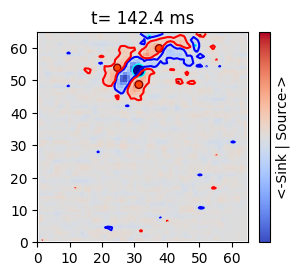

In [42]:
f=contornoyfondoplot(csda, CMPos, CMNeg)
savefig("tuabuela.png", dpi=92)

In [44]:
for n=1000:2000
    f=contornoyfondoplot(csda, CMPos, CMNeg, epsi,150,n)
    nstring=lpad(n, 5, "0")
    savefig("csd_nearest_facilitada_singleevent_$nstring.png",dpi=90)
    PyPlot.close_figs()
end
PyPlot.close_figs()


In [24]:
corte(x,ϵ)=x> ϵ ? x : 0

corte (generic function with 1 method)

In [25]:
extrema(csda[:,:,t])

(-223.48892f0, 99.84654f0)

In [26]:
ejemplopos=map(x->corte(x, 18), csda[:,:,t]);

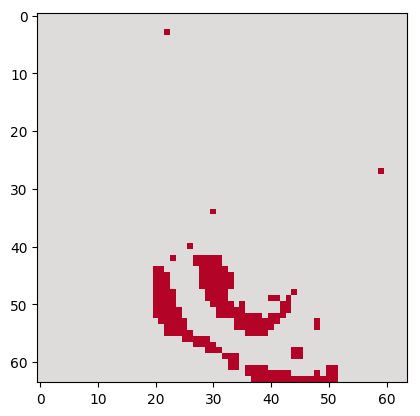

PyObject <matplotlib.image.AxesImage object at 0x7fda324d7940>

In [27]:
imshow(ejemplopos, cmap="coolwarm", vmin=-1,vmax=1)

In [28]:
t=1050
ejemploneg=-map(x->corte(-x, 18), csda[:,:,t]);
ejemplo=csda[:,:,t];

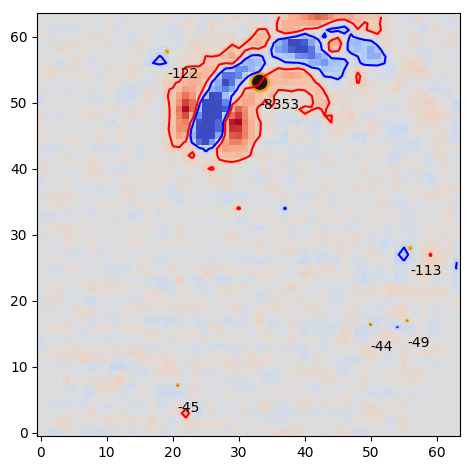

In [29]:
imshow(ejemplo, cmap="coolwarm", vmin=-100,vmax=100, origin="lower")
xxneg=CMNeg[t][:,1]
yyneg=CMNeg[t][:,2]
valorneg=CMNeg[t][:,3]
scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="black", edgecolors="orange", lw=2)
contour(ejemplo, v, colors=("blue", "red"))


for j in 1:size(valorneg,1)
    annotate(round(Int,valorneg[j]),xy=(xxneg[j],yyneg[j]-4))
end

tight_layout()
savefig("EjemploFronteraComponentesDisjuntos01.svg")

In [30]:

#t=120
# ion()
ioff()
paso=1
for n=inicio:paso:final

    ejemploneg=-map(x->corte(-x, 18), csda[:,:,n]);
    ejemplopos=map(x->corte(x, 18), csda[:,:,n]);


    farofa, lista=subplots(1,2, figsize=(8.5,4))

     tiempo=round((n-retrazo)/freq, digits=1);
        suptitle("t= $tiempo ms", fontsize=14)

    
    lista[1].set_xlim(0,65)
    lista[1].set_ylim(0,65)
    
    
    lista[1].imshow(ejemploneg, cmap="coolwarm", vmin=-1,vmax=1, origin="lower", extent=[0.5,64.5, 0.5,64.5])
    
    
    
    xxneg=CMNeg[n][:,1]
    yyneg=CMNeg[n][:,2]
    valorneg=CMNeg[n][:,3]
    lista[1].scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="black", edgecolors="orange", lw=2)
    lista[1].set_title("Negative Components (Sinks)")

    for j in 1:size(valorneg,1)
        lista[1].annotate(round(Int,valorneg[j]),xy=(xxneg[j],yyneg[j]-4))
    end


    
    lista[2].set_xlim(0,65)
    lista[2].set_ylim(0,65)
    

    lista[2].imshow(ejemplopos, cmap="coolwarm", vmin=-1,vmax=1, origin="lower", extent=[0.5,64.5, 0.5,64.5])
    xxpos=CMPos[n][:,1]
    yypos=CMPos[n][:,2]
    valorpos=CMPos[n][:,3]
    lista[2].scatter(xxpos, yypos,s=0.02*abs.(valorpos), alpha=0.9, c="black", edgecolors="orange", lw=2)
    lista[2].set_title("Positive Components (Sources)")

    for j in 1:size(valorpos,1)
        lista[2].annotate(round(Int,valorpos[j]),xy=(xxpos[j],yypos[j]-4))
    end
      nstring=lpad(n, 6, "0")
     savefig("DisjointComponent_Facilitad_Single_Event-$nstring.png", dpi=90)
     close()
end

El epsilon para los componentes disjuntos fue de 2.7

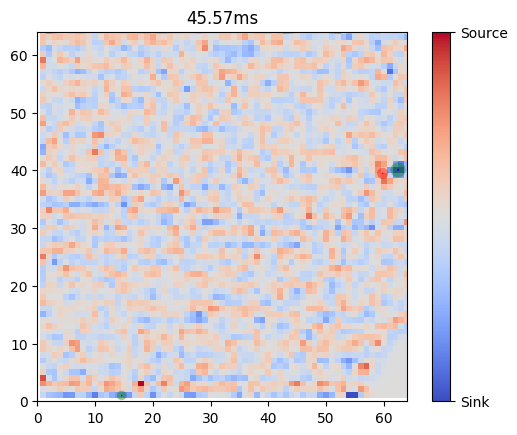

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[42]:42
└ @ Core In[42]:42


PyObject Text(0.5, 1.0, '45.57ms')

In [42]:

#No esta funcionando esto!
font1 = ["family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20]


t=320

#for t=inicio:paso:final

    EjemploCentrosCSDPos=CMPos[t]
    xxpos=EjemploCentrosCSDPos[:,1]
    yypos=EjemploCentrosCSDPos[:,2]
    valorpos=EjemploCentrosCSDPos[:,3]

    EjemploCentrosCSDNeg=CMNeg[t]
    xxneg=EjemploCentrosCSDNeg[:,1]
    yyneg=EjemploCentrosCSDNeg[:,2]
    valorneg=EjemploCentrosCSDNeg[:,3];
    CSDEjemplo=csda[:,:,t];


#################

    tiempo=round((t-retrazo)/freq, digits=2);
    titulo="$tiempo" *"ms"

    limites=20
    figura=figure()
    xlim(0,64)
    ylim(0,64)
    #tick_params(labelbottom="off", labelleft="off")
    otraimagen=imshow(CSDEjemplo, origin="lower", interpolation="nearest",
                          cmap="coolwarm", 
                      vmin=-limites,vmax=limites,extent=[0.5, 64.5, 0.5, 64.5] )

    #cb=colorbar(otraimagen)
    #cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
    cb=colorbar(otraimagen, ticks=[-limites, +limites], use_gridspec="True")
    farofa=cb[:set_ticklabels](["Sink", "Source"])
    #xlabel("furufu", fontdict=font1)

    scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
    scatter(xxneg, yyneg, s=abs.(valorneg), alpha=0.4, c="g", edgecolors="none")
    scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="r", edgecolors="none")
    scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="b", edgecolors="none")

    title(titulo)
    #savefig("CSDCM_Evento_control-5-$t.png", dpi=90)
    # close(figura)
#end

In [ ]:
Componentes91=CMP[100]

In [ ]:
CMPos[1001]

In [ ]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

In [ ]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

In [ ]:
aver=imshow(bgrande,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

In [ ]:
plot(1:127,tu)
plot(1:127,te)

In [ ]:
bgmin=bgrande/minimum(bgrande)

In [ ]:
cloack=bgmin-brmin

In [ ]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

In [ ]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

In [ ]:
KOp[1:64,1:64]

# Pruebas de Estabilidad en una submatrix pequeñita

In [ ]:
Kdd=readdlm("../kCSD/Krevisarestable.dat")
Ktildedd=readdlm("../kCSD/KTilderevisarestable.dat");

In [ ]:
size(Kdd)

In [ ]:
sublfp=LFP[41:64,11:34,1000]
saturados=Set{Array{Int,1}}()
push!(saturados, [1,1])

In [ ]:
writedlm("EjemplitoLFP.dat",sublfp)

In [ ]:
saturados

In [ ]:
imshow(sublfp)

In [ ]:
include("../CSDA/LindenbergOperadores.jl")
importall LindenbergOperadores

In [ ]:
aux1=GaussianSmooth(sublfp);
aux2=DiscreteLaplacian(aux1);
dcsd=-aux2;

In [ ]:
writedlm("EjemplitodCSD.dat",dcsd)
vlim=100
imshow(dcsd,cmap="seismic",vmin=-vlim,vmax=vlim)

In [ ]:
todaslasX=Array[]

ncuad=24
Ntot=ncuad^2

for j=1:ncuad,k=1:ncuad
    push!(todaslasX,[j,k])
end

xpurgadas=filter(q->!(q in saturados), todaslasX)
nbuenas=length(xpurgadas)

CSDtentativa=zeros(Ntot)
CSD=zeros(sublfp)

lfpv=zeros(nbuenas)

println("Acomodando los LFP correctos")

for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    lfpv[j]=sublfp[renglon,columna]
end


In [ ]:
rangolambda=20


CSD=zeros(Float64,ncuad,ncuad,rangolambda)
CSDTentativa=zeros(nbuenas,rangolambda)

#nbuenas es la long de la diagonal!!!
## y de cualquier lado de la matriz, daah..
KLambda=deepcopy(Kdd)
KTT=zeros(Kdd)

intervalo=0.2


for l=1:rangolambda
     KLambda=deepcopy(Kdd)
    lambda=l/(rangolambda)
    println(lambda, " ",KLambda[8,8])
    for j=1:nbuenas
       
        KLambda[j,j]=KLambda[j,j]/2.0*(1.0+intervalo*lambda)
    
        KTT=transpose(Ktildedd)*inv(KLambda)
    end
    println(lambda, ",", KTT[8,8], " ", KLambda[8,8])
    CSDTentativa[:,l]=KTT*lfpv 
    
end


for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    CSD[renglon,columna,:]=CSDTentativa[j,:]
end


println("terminando calculo")
writedlm("EjemplitokCSD.dat",CSD)

In [ ]:
intervalo=(1,1.2)
save("EjemploskCSD.jld", "CSD", CSD)

In [ ]:
farofa, lista=subplots(4,5, figsize=(25,20))
vlim=40
intervalo=0.2
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    reallambda=(1+intervalo*j/rangolambda)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](CSD[:,:,j],cmap="seismic",vmin=-vlim,vmax=vlim)
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
savefig("VarioskCSD03.png",dpi=92)

In [ ]:
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    if pa==0; pa=5 ; end
    println(pu," ",pa)
end